In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import *

In [8]:
data_path=Path("data_files")
all_data=data_path.glob('*.txt')
data_list=list(all_data)

In [9]:
data_list

[PosixPath('data_files/All-damages_4mm_eps5.txt'),
 PosixPath('data_files/All-damages_5mm_eps5.txt'),
 PosixPath('data_files/All-damages_head_eps5.txt'),
 PosixPath('data_files/All-damages_3mm_eps5.txt')]

In [10]:
df_data=list()
for data in data_list:
    print('i')
    df=pd.read_csv(data,header=None,names=['damage_type','x_coord','y_coord','width','height','accuracy','resolution','full_width','full_height'],delimiter='\t',index_col=False)
    df.replace(2,'laves_crack',inplace=True)
    df.replace(0,'interface_decohesion',inplace=True)   
    df['filename']=data.stem[12:]
    df['x']=df['x_coord']*df['resolution']
    df['y']=df['y_coord']*df['resolution']
    df['area']=df['resolution']*df['resolution']*df['full_width']*df['full_height']
    df_data.append(df)
plot_data=pd.concat(df_data)

i
i
i
i


In [11]:
plot_data

,damage_type,x_coord,y_coord,width,height,accuracy,resolution,full_width,full_height,filename,x,y,area
0,interface_decohesion,687.0,3458.0,90,112,0.445557,0.016276,34980.0,24943.0,4mm_eps5,11.181641,56.282552,231135.193507
1,laves_crack,1845.0,1148.0,74,92,0.814453,0.016276,34980.0,24943.0,4mm_eps5,30.029297,18.684896,231135.193507
2,laves_crack,881.0,3670.0,110,140,0.911133,0.016276,34980.0,24943.0,4mm_eps5,14.339193,59.733073,231135.193507
3,laves_crack,1529.0,7688.0,74,92,0.334717,0.016276,34980.0,24943.0,4mm_eps5,24.886068,125.130208,231135.193507
4,laves_crack,2774.0,7212.0,64,84,0.674316,0.016276,34980.0,24943.0,4mm_eps5,45.149740,117.382812,231135.193507
...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,interface_decohesion,46032.0,19180.0,90,92,0.881348,0.016276,46336.0,25866.0,3mm_eps5,749.218750,312.174479,317501.220703
277,laves_crack,44904.0,22468.0,45,56,0.262695,0.016276,46336.0,25866.0,3mm_eps5,730.859375,365.690104,317501.220703
278,interface_decohesion,45193.0,23210.0,55,64,0.454834,0.016276,46336.0,25866.0,3mm_eps5,735.563151,377.766927,317501.220703
279,laves_crack,45252.0,22212.0,70,84,0.881836,0.016276,46336.0,25866.0,3mm_eps5,736.523437,361.523437,317501.220703


In [5]:
plot_data2=plot_data[plot_data['filename'].str.contains("3mm_eps5|head_eps5",regex=True)]

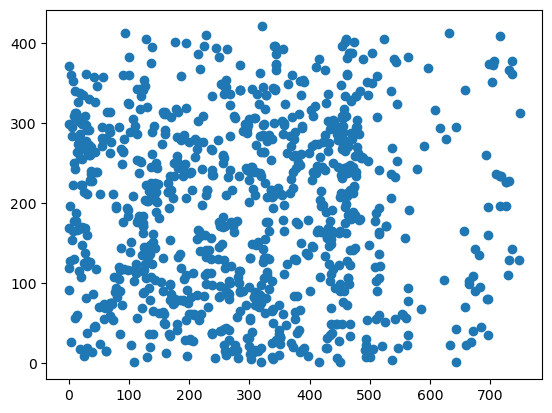

In [6]:
plt.scatter(plot_data.x,plot_data.y)

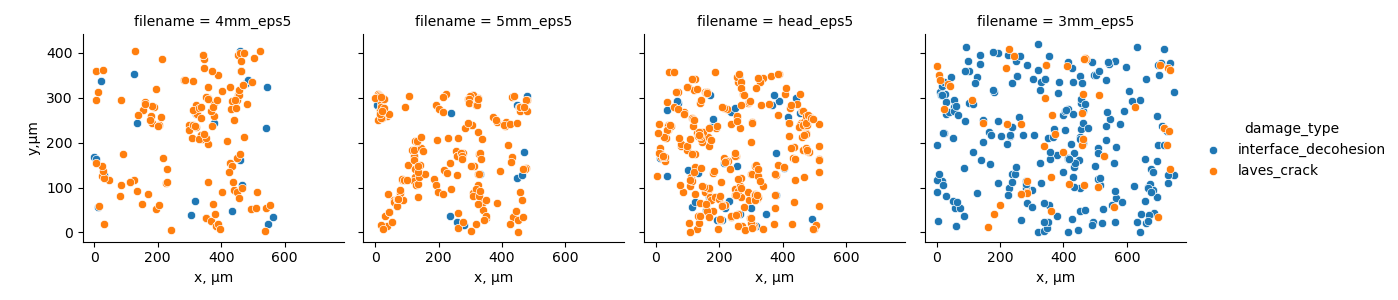

In [12]:
%matplotlib widget
import seaborn as sns
grid=sns.FacetGrid(plot_data,col='filename',hue='damage_type',legend_out=True)
grid.map(sns.scatterplot,'x','y')
grid.add_legend()
grid.set_xlabels("x, µm")
grid.set_ylabels("y,µm")
# sns.scatterplot(data=plot_data,x='x',y='y',hue='damage_type')


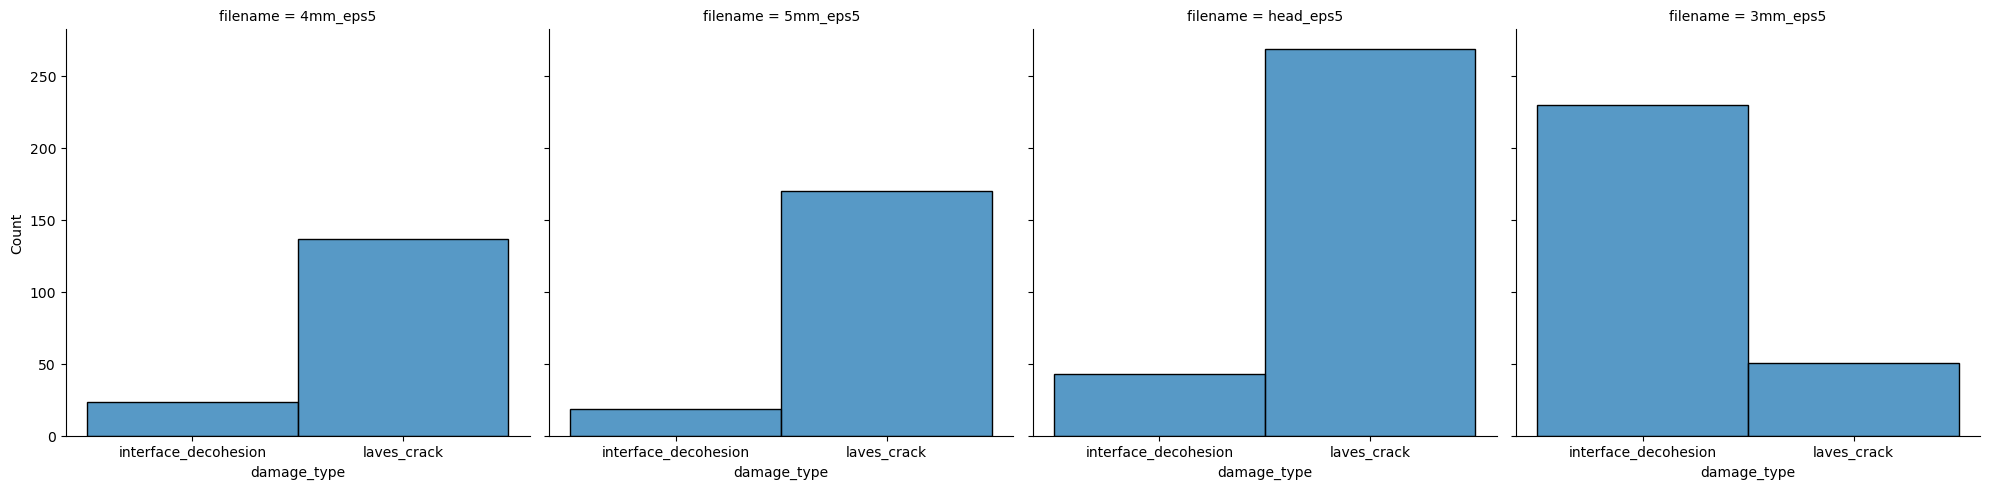

In [7]:
sns.displot(data=plot_data,x='damage_type',col='filename')

In [230]:
damage_counts=plot_data.groupby(by=['damage_type','filename']).count()['x_coord']
mean_vals=plot_data.groupby(by=['damage_type','filename']).mean()
normed_damage=damage_counts/mean_vals['area']*1e6

In [231]:
normed_damage['interface_decohesion'].values

array([724.40666367, 103.83533393, 128.67411091, 318.88017031])

In [229]:

mean_vals

x_coord       y_coord  \
damage_type          filename                                            
interface_decohesion 3mm_yolov5_eps5_leo    22756.052174  12576.673913   
                     4mm_3_yolov5_eps5_leo  20266.000000  12287.958333   
                     5mm_3_yolov5_eps5_leo  17157.473684   9912.315789   
                     head_yolov5_eps5_leo    9842.906977   7036.302326   
laves_crack          3mm_yolov5_eps5_leo    23069.803922  14394.352941   
                     4mm_3_yolov5_eps5_leo  19074.510949  13364.635036   
                     5mm_3_yolov5_eps5_leo  13984.117647  10422.888235   
                     head_yolov5_eps5_leo   10430.371747   7226.111524   

                                                 width      height  accuracy  \
damage_type          filename                                                  
interface_decohesion 3mm_yolov5_eps5_leo     64.356522   69.091304  0.664808   
                     4mm_3_yolov5_eps5_leo   88.791667   95.208333  0.682353   
                     5mm_3_yolov5_eps5_leo  110.421053  111.736842  0.629780   
                     head_yolov5_eps5_leo    83.116279   91.395349  0.603822   
laves_crack          3mm_yolov5_eps5_leo     64.784314   72.862745  0.626211   
                     4mm_3_yolov5_eps5_leo   72.416058   87.394161  0.734895   
                     5mm_3_yolov5_eps5_leo   88.041176  101.805882  0.815209   
                     head_yolov5_eps5_leo    73.457249   87.661710  0.800027   

                                            resolution  full_width  \
damage_type          filename                                        
interface_decohesion 3mm_yolov5_eps5_leo      0.016276     46336.0   
                     4mm_3_yolov5_eps5_leo    0.016276     34980.0   
                     5mm_3_yolov5_eps5_leo    0.016276     29411.0   
                     head_yolov5_eps5_leo     0.024414     21108.0   
laves_crack          3mm_yolov5_eps5_leo      0.016276     46336.0   
                     4mm_3_yolov5_eps5_leo    0.016276     34980.0   
                     5mm_3_yolov5_eps5_leo    0.016276     29411.0   
                     head_yolov5_eps5_leo     0.024414     21108.0   

                                            full_height           x  \
damage_type          filename                                         
interface_decohesion 3mm_yolov5_eps5_leo        25866.0  370.378453   
                     4mm_3_yolov5_eps5_leo      24943.0  329.850260   
                     5mm_3_yolov5_eps5_leo      18952.0  279.255757   
                     head_yolov5_eps5_leo       10718.0  240.305346   
laves_crack          3mm_yolov5_eps5_leo        25866.0  375.485090   
                     4mm_3_yolov5_eps5_leo      24943.0  310.457535   
                     5mm_3_yolov5_eps5_leo      18952.0  227.606081   
                     head_yolov5_eps5_leo       10718.0  254.647748   

                                                     y           area  
damage_type          filename                                          
interface_decohesion 3mm_yolov5_eps5_leo    204.698469  317501.220703  
                     4mm_3_yolov5_eps5_leo  199.999322  231135.193507  
                     5mm_3_yolov5_eps5_leo  161.333265  147659.850650  
                     head_yolov5_eps5_leo   171.784725  134846.892357  
laves_crack          3mm_yolov5_eps5_leo    234.283088  317501.220703  
                     4mm_3_yolov5_eps5_leo  217.523357  231135.193507  
                     5mm_3_yolov5_eps5_leo  169.643363  147659.850650  
                     head_yolov5_eps5_leo   176.418738  134846.892357

In [197]:
norm_d_2

filename,3mm_yolov5_eps5_leo,4mm_3_yolov5_eps5_leo,5mm_3_yolov5_eps5_leo,head_yolov5_eps5_leo
damage_type,,,,
interface_decohesion,724.406664,103.835334,128.674111,318.880170
laves_crack,160.629304,592.726698,1151.294677,1994.855019


In [207]:

norm_d_2=normed_damage.unstack(level=1)


ValueError: cannot join with no overlapping index names

In [206]:
normed_damage

area  x_coord
damage_type          filename                            
interface_decohesion 3mm_yolov5_eps5_leo     NaN      NaN
                     4mm_3_yolov5_eps5_leo   NaN      NaN
                     5mm_3_yolov5_eps5_leo   NaN      NaN
                     head_yolov5_eps5_leo    NaN      NaN
laves_crack          3mm_yolov5_eps5_leo     NaN      NaN
                     4mm_3_yolov5_eps5_leo   NaN      NaN
                     5mm_3_yolov5_eps5_leo   NaN      NaN
                     head_yolov5_eps5_leo    NaN      NaN

[Text(0, 0, '3mm_eps5'),
 Text(0, 1, '4mm_eps5'),
 Text(0, 2, '5mm_eps5'),
 Text(0, 3, 'head_eps5')]

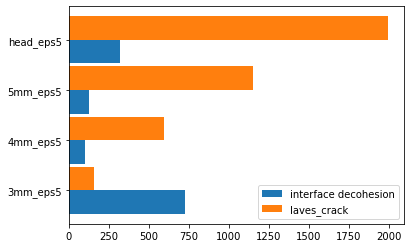

In [257]:
fig,ax=plt.subplots()

y_pos=np.arange(4)
if_dec=normed_damage['interface_decohesion'].values
laves_crack=normed_damage['laves_crack'].values

h=0.47
ax.barh(y_pos-h/2,if_dec,height=h,label='interface decohesion')
ax.barh(y_pos+h/2,laves_crack,height=h,label='laves_crack')
ax.legend()
ax.set_yticks(y_pos)
ax.set_yticklabels(labels=normed_damage['interface_decohesion'].index)

In [253]:
import matplotlib
matplotlib.__version__

'3.3.1'